The data was collected on undergraduate students in the Faculty of Technology in the Department of Computer Engineering at Gazi University in October of 2009. It measured their knowledge on the subject of Electrical DC Machines using study time, study repetition and exam performance to determine their knowledge level. 

Question: If a user spends a minimal time studying (< 0.2 STG) but obtains a high exam performance (> 0.9 PEG), does the user have a high knowledge level?

The dataset being used is User Knowledge Modeling Data Set and includes factors that measured the study time of more and less specific information for an exam as well as study repetition of this material. Exam performance on specific and less specific information was also measured. These factors were recorded on a scale of 0.00-1.00. These observations were then used to determine the target value of the knowledge level which was categorized with very low, low, middle and high. Preliminary exploratory data analysis:

Preliminary exploratory data analysis:

In [51]:
library(tidyverse)
library(readxl)
library(repr)
library(tidymodels)

In [53]:
knowledge_train_data <- read_excel("data/knowledge_data.xls", sheet = 2, skip = 7) %>%
    mutate(UNS = as_factor(UNS)) %>%
    select(STG,PEG,UNS)
knowledge_test_data <- read_excel("data/knowledge_data.xls", sheet = 3) %>%
   mutate(UNS = as_factor(UNS)) %>%
    select(STG,PEG,UNS)
knowledge_data_train
knowledge_data_test

New names:
* `` -> ...7
* `` -> ...8



STG,PEG,UNS
<dbl>,<dbl>,<fct>
0.00,0.00,very_low
0.08,0.90,High
0.06,0.33,Low
⋮,⋮,⋮
0.54,0.77,High
0.50,0.26,Middle
0.66,0.74,High


STG,PEG,UNS
<dbl>,<dbl>,<fct>
0.00,0.05,Very Low
0.05,0.14,Low
0.08,0.85,High
⋮,⋮,⋮
0.56,0.32,Low
0.66,0.57,Middle
0.68,0.24,Middle


In [54]:
knowledge_train_summary <- knowledge_train_data %>%
    group_by(UNS) %>%
    summarize(count = n(), 
              mean_STG = mean(STG), 
              mean_PEG = mean(PEG),
             max_STG = max(STG), 
              max_PEG = max(PEG),
             min_STG = min(STG), 
              min_PEG = min(PEG))
knowledge_train_summary

`summarise()` ungrouping output (override with `.groups` argument)



UNS,count,mean_STG,mean_PEG,max_STG,max_PEG,min_STG,min_PEG
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,24,0.3057917,0.09083333,0.68,0.24,0.00,0.00
High,63,0.4216508,0.77253968,0.99,0.93,0.00,0.47
Low,83,0.3211446,0.23762651,0.73,0.35,0.02,0.01
Middle,88,0.3999773,0.54238636,0.80,0.83,0.06,0.25


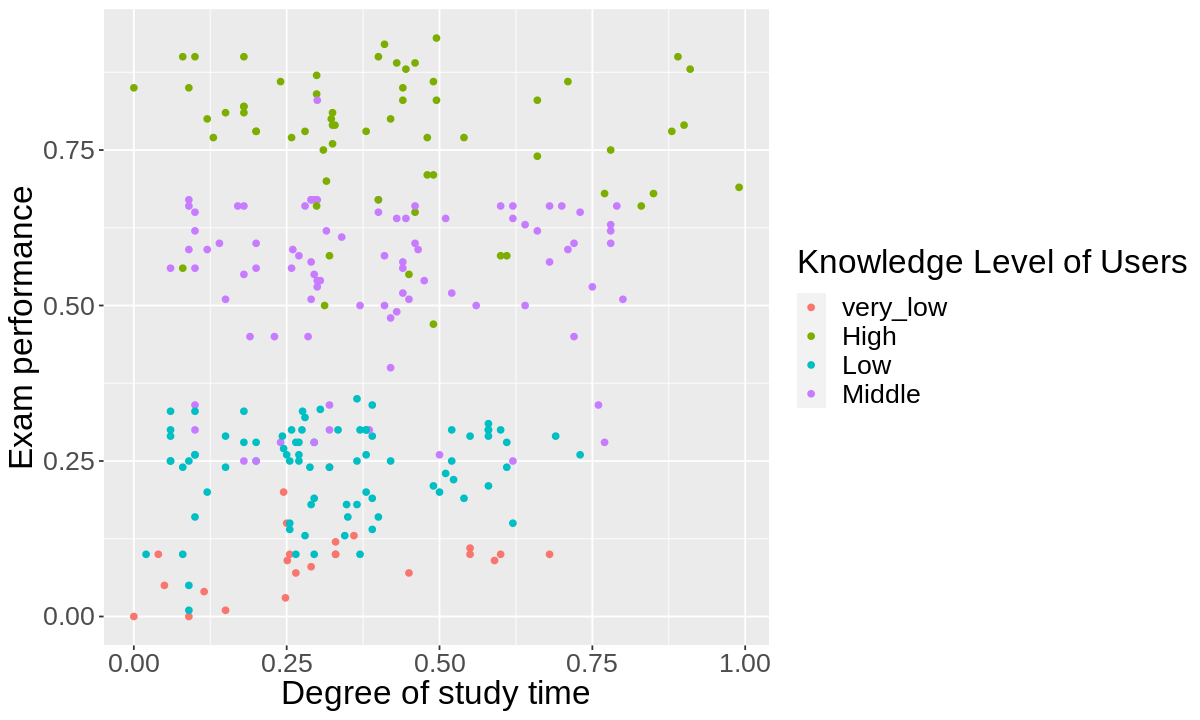

In [57]:
options(repr.plot.width=10, repr.plot.height=6)
knowledge_train_plot <- knowledge_train_data %>%
    ggplot(aes(x=STG, y= PEG, colour = UNS)) +
        labs(x = "Degree of study time",
             y = "Exam performance",
            colour = 'Knowledge Level of Users') +
        geom_point() +
        theme(text = element_text(size = 20))
knowledge_train_plot

Methods:

We will conduct our data analysis by using the STG (The degree of study time for goal object materials) and PEG (The exam performance of users for goal objects) variables. We will use these two variables in order to predict the UNS (The knowledge level of user) of a user that has low STG but a high PEG.

One way that we will visualize the results will be using a scatter plot then using a assigning the knowledge level of users using different colors.

Expected outcomes and significance:

We were expecting for the UNS to be high with minimal STG and high PEG. We think this may be, because the user has understood the material well enough, which explains why they could score a high PEG with a low STG.

These findings can either encourage users to put in more study time or less.

If a user spends a maximum time studying but obtains a low exam performance, does the user have a high knowledge level?